
# Position changes during a race

Plot the position of each driver at the end of each lap.


In [1]:
import matplotlib.pyplot as plt

import fastf1.plotting

# Enable the cache
fastf1.Cache.enable_cache('cache')
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

Load the session and create the plot



core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '22', '2', '3', '77', '24', '18', '10']


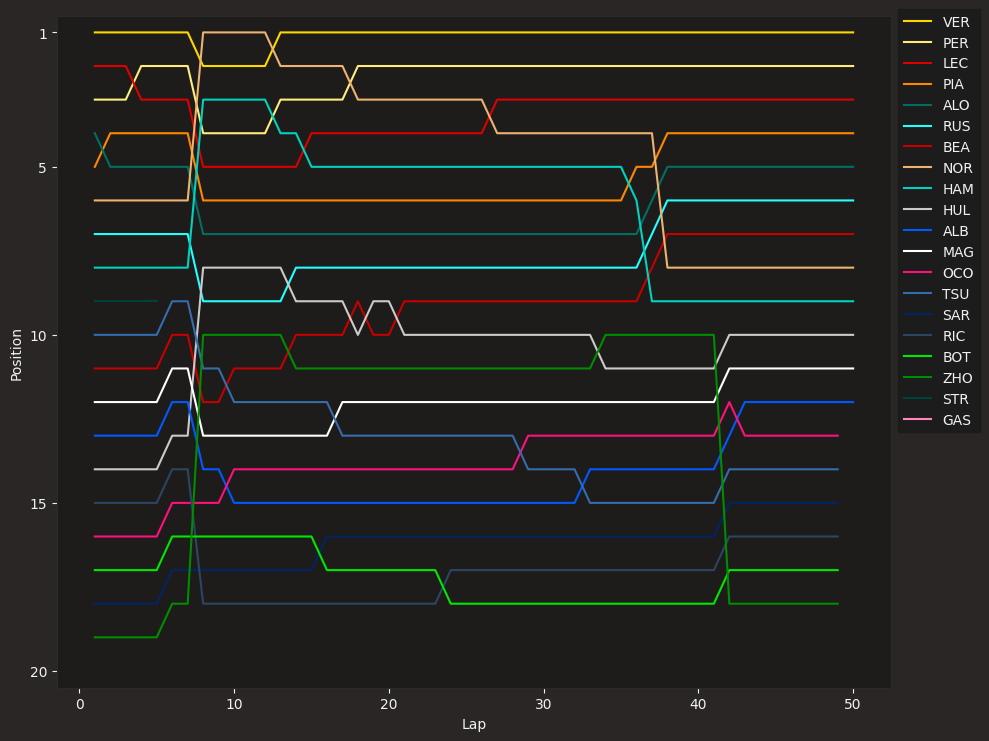

In [6]:
session = fastf1.get_session(2024, 'Jeddah', 'R')
session.load(telemetry=False, weather=False)

fig, ax = plt.subplots(figsize=(10, 7.5))

for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()